In [2]:
import numpy as np ;
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

In [3]:
dataset = pd.read_csv("September_MyCall_2023.csv")
# dataset = [11,10,12,13,14,107,15,16,120,166,15,17,18,19,20,21,22,10,11,50,60,59,6,120,119]


array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>, <Axes: >]], dtype=object)

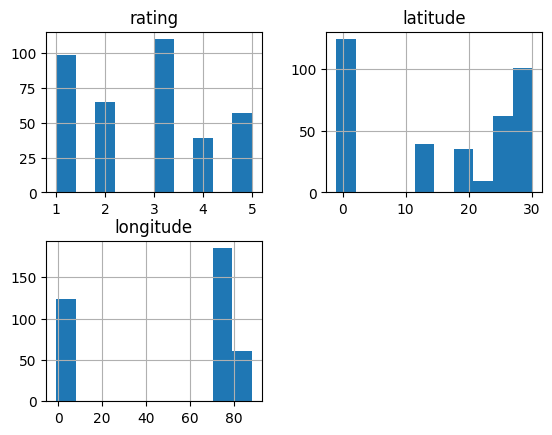

In [4]:
# plt.hist(dataset)
dataset.hist()

<h3> Removing NULL values </h3>

In [48]:
dataset.isnull().sum()

operator               0
inout_travelling       0
network_type           0
rating                 0
calldrop_category      0
latitude               0
longitude              0
state_name           124
dtype: int64

In [50]:
cleaned_data = dataset.dropna()

In [ ]:
cleaned_data.isnull().sum()

<u><b>Detecting outliers</b></u>
    <ul>Using Z-score </ul>

In [52]:
outliers  = []
# def detect_outliers (data):
#     threshold = 3 # 3rd Standard deviation
#     mean = np.mean(data)
#     std = np.std(data)
#     for i in data :
#         z_score = (i - mean) / std 
#         if (np.abs(z_score) > threshold):
#             outliers.append(i)
#     return outliers
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [53]:

print("outliers from the dataset are " ,detect_outliers_zscore(dataset["rating"]))
# sb.boxplot(dataset,orient="h")

outliers from the dataset are  []


{'whiskers': [<matplotlib.lines.Line2D at 0x258386c3bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x258386c2810>,
 'boxes': [<matplotlib.lines.Line2D at 0x25838ab9150>],
 'medians': [<matplotlib.lines.Line2D at 0x25838a77cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25838a77810>],
 'means': []}

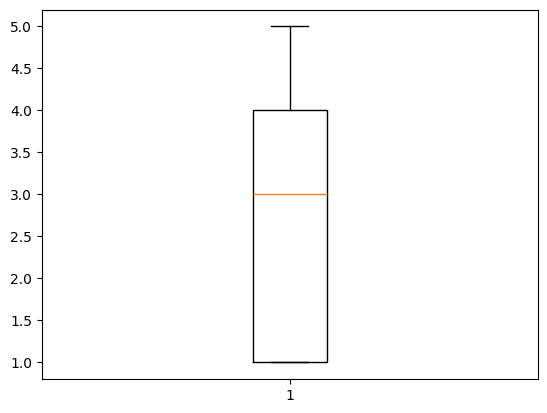

In [59]:
plt.boxplot(dataset["rating"])

<h2> Using <u>IQR</u> (inter quantile range) </h2>

<ol> 
    <li><b> sort the data </b> </li>
    <li><b> calulate Q1(25%) ,Q3(75%) </b> </li>
    <li> <b>IQR(Q3-Q1)</b> </li>
    <li> <b>Find the lower limit (q1-1.5(iqr))</b> </li>
    <li> <b>Find the upper limit (q3+1.5(iqr))</b> </li>
</ol>

<Axes: xlabel='rating'>

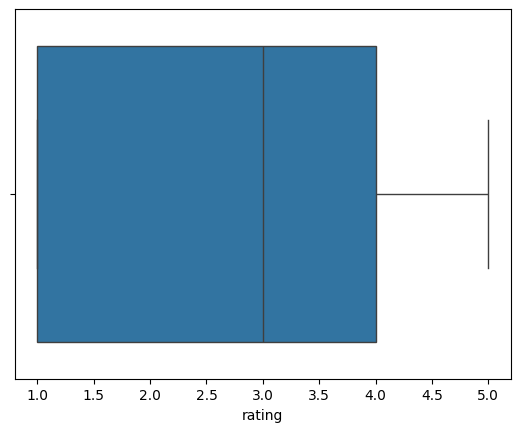

In [65]:
sorted_data = dataset.sort_values(by="rating",ascending=True)
sb.boxplot(dataset["rating"],orient="h")

In [67]:
#2
Q1,Q3 = np.percentile(dataset["rating"],[25,75],interpolation="midpoint")
Q1,Q3

(1.0, 4.0)

In [68]:
IQR = Q3-Q1
IQR

3.0

In [69]:
#3
lower_limit = Q1 - (1.5 *IQR)
upper_limit = Q3 + (1.5*IQR)
lower_limit,upper_limit

(-3.5, 8.5)

Text(0.5, 1.0, 'Outlies in Dataset')

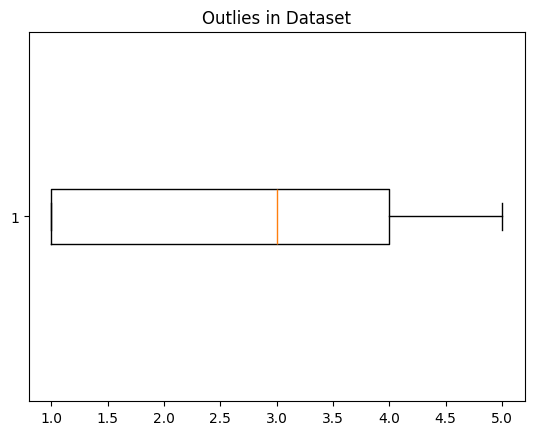

In [71]:
plt.boxplot(dataset["rating"],vert=False)
plt.title("Outlies in Dataset")
# sb.boxplot(dataset , orient="h")

In [76]:
dataset.isna().sum()

operator               0
inout_travelling       0
network_type           0
rating                 0
calldrop_category      0
latitude               0
longitude              0
state_name           124
dtype: int64